# Modelo predictivo llamadas Contact Center
## Notebook 2 - Importación datos de llamadas

## Importacion de librerias 

In [1]:
import pandas as pd
pd.options.display.max_columns = None

### Importacion de los datos de llamadas por oficinas

In [2]:
df_calls = pd.read_csv('data/new_calls.csv', low_memory=False)

In [3]:
df_calls.columns

Index(['Unnamed: 0', 'IDCAMPANYA', 'IDSUJETO', 'VALOR', 'DATACREACIO'], dtype='object')

In [4]:
df_calls = df_calls[['IDCAMPANYA','VALOR','DATACREACIO']]
df_calls.head()

,IDCAMPANYA,VALOR,DATACREACIO
0,100000021,No tiene Numero,2019-01-02 08:06:49
1,100000022,Recogida,2019-01-02 08:08:18
2,100000015,Estado de Pedido,2019-01-02 08:09:06
3,100000015,Recogida,2019-01-02 08:13:47
4,100000015,No tiene Numero,2019-01-02 08:15:15


### Ver distribución de las llamadas por tipo

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = df_calls
df['VALOR'] = ['Estado de Pedido' if item == 'No tiene Numero' else item  for item in df['VALOR']]
df = df_calls.groupby('VALOR').count()[['DATACREACIO']]

In [7]:
x = df.index
y = df['DATACREACIO']

<AxesSubplot:xlabel='VALOR'>

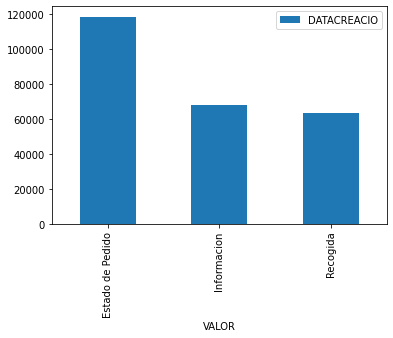

In [8]:
df.plot(kind='bar')

### Preparacion del dataframe de trabajo

In [9]:
df_calls['tCreacion'] = pd.to_datetime(df_calls['DATACREACIO'])

df_calls['Date'] = df_calls['tCreacion'].dt.date
df_calls['Date'] = df_calls['Date'].astype('str')

df_calls['dateCreacion'] = df_calls['tCreacion'].dt.date
df_calls['dateCreacion'] = df_calls['dateCreacion'].astype('str')

In [10]:
df_calls.head()

,IDCAMPANYA,VALOR,DATACREACIO,tCreacion,Date,dateCreacion
0,100000021,Estado de Pedido,2019-01-02 08:06:49,2019-01-02 08:06:49,2019-01-02,2019-01-02
1,100000022,Recogida,2019-01-02 08:08:18,2019-01-02 08:08:18,2019-01-02,2019-01-02
2,100000015,Estado de Pedido,2019-01-02 08:09:06,2019-01-02 08:09:06,2019-01-02,2019-01-02
3,100000015,Recogida,2019-01-02 08:13:47,2019-01-02 08:13:47,2019-01-02,2019-01-02
4,100000015,Estado de Pedido,2019-01-02 08:15:15,2019-01-02 08:15:15,2019-01-02,2019-01-02


In [11]:
df_calls = df_calls[['Date','dateCreacion','IDCAMPANYA','VALOR']]

### Filtramos campaña

In [12]:
df_calls = df_calls.groupby(['Date','IDCAMPANYA','VALOR']).count()

In [13]:
df_calls.head()

dateCreacion
Date       IDCAMPANYA VALOR                         
2019-01-02 100000015  Estado de Pedido            86
                      Informacion                 38
                      Recogida                    43
           100000021  Estado de Pedido           104
                      Informacion                 31

In [14]:
df_calls = df_calls.reset_index()

In [15]:
df_calls.head()

,Date,IDCAMPANYA,VALOR,dateCreacion
0,2019-01-02,100000015,Estado de Pedido,86
1,2019-01-02,100000015,Informacion,38
2,2019-01-02,100000015,Recogida,43
3,2019-01-02,100000021,Estado de Pedido,104
4,2019-01-02,100000021,Informacion,31


In [16]:
df = df_calls.head(1)
df['VALOR'].values

array(['Estado de Pedido'], dtype=object)

##### Nos quedamos únicamente con los registros que hacen referencia a llamadas para consultar un estado de pedido, en este caso 'Estado de Pedido' y 'No tiene Numero'

In [17]:
df_calls = df_calls[(df_calls['VALOR'] == 'Estado de Pedido') | (df_calls['VALOR'] == 'No tiene Numero')]
df_calls.head()

,Date,IDCAMPANYA,VALOR,dateCreacion
0,2019-01-02,100000015,Estado de Pedido,86
3,2019-01-02,100000021,Estado de Pedido,104
6,2019-01-02,100000022,Estado de Pedido,34
9,2019-01-02,100000023,Estado de Pedido,41
12,2019-01-02,100000024,Estado de Pedido,16


##### Agrupamos por fecha para tener el total de llamadas por día

In [18]:
df_calls = df_calls.groupby('Date').sum()[['dateCreacion']]

In [19]:
df_calls.head()

,dateCreacion
Date,
2019-01-02,281
2019-01-03,283
2019-01-04,351
2019-01-07,173
2019-01-08,174


In [20]:
df_calls.to_pickle('./data/df_Call')